# BB84 PROTOCOL

In [ ]:
''' 
Create a virtual environment First
Run the follow command to install all library:
    pip install requirements.txt -r
Set up the kernel as the virtual environment
'''

# Import necessary components from Qiskit
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization.bloch import Bloch

import random as rd

### Test the libraries are properly working

qiskit version: 2.1.2


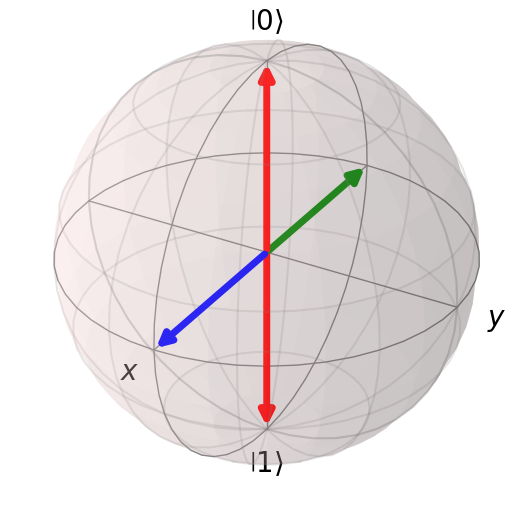

In [2]:
print("qiskit version:",qiskit.__version__)
bloch = Bloch()
bloch.vector_color = ['red', 'red', 'blue', 'green']

sv = []
sv.append([0,0,1])  # |0> in red
sv.append([0,0,-1]) # |1> in red
sv.append([1,0,0])  # |+> in blue
sv.append([-1,0,0]) # |-> in green

bloch.add_vectors(sv)
bloch.render()

In [3]:
# helper.py must be there, its an important file.
from helper import MESSAGE_BITS, POSSIBLE_BASES, EMPTY, SMALL_KEY_LENGTH, MAX_KEY_LENGTH, SIMULATOR_METHOD
from helper import generate_random_bits, Generate_random_bases, encryption_decryption

#### Resources:
1) [Understanding BB84](https://www.rri.res.in/quic/qcommconcepts.php)
2) [fundamentals of OKD](https://medium.com/@qcgiitr/fundamentals-of-quantum-key-distribution-bb84-b92-e91-protocols-e1373b683ead)

🔹 BB84
- Measuring in wrong basis disturbs qubit states.
- Disturbance reveals eavesdropping via error rate.
- No-cloning theorem prevents copying unknown qubits.

### Mission Objective:
- Implement the BB84 Quantum Key Distribution protocol in this Jupyter notebook using Qiskit. 
- Ensure that Agent A and Agent B successfully exchange a secret quantum key.

In [4]:
# We are going to send a binary message
print(f"Message contains: {MESSAGE_BITS}")
print(f"EMPTY value: {EMPTY}")

# In the BB84 Protocol, We use two basis for the encryption and measurement
print(f"Used_bases: {POSSIBLE_BASES}")  # Horizontal (H) for 0 or 90 deg, Diagonal (D) for + or -45 deg

Message contains: (0, 1)
EMPTY value: -1
Used_bases: ['H', 'D']


Let us first generate a random message for Agent A.\
Along with the random basis for encoding the bits.

In [5]:
# Thus we need to generate a key for encryption
key_length = SMALL_KEY_LENGTH  # Length of the key you want to generate

# Generate Agent Alice's random bits of key
alice_bits = generate_random_bits(key_length)
alice_bases = Generate_random_bases(key_length)

print(f"Bits: {alice_bits}")
print(f"Bases: {alice_bases}")

Bits: [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
Bases: ['H', 'D', 'H', 'D', 'D', 'D', 'D', 'H', 'H', 'D', 'H', 'H', 'H', 'D', 'D', 'H']


Prepare the states for Agent Alice based on the BB84 protocol.\
Depending on the Basis, the bits are encoded to corresponding states.

- *Basis:* H, D (not to confuse with gates !)
- 0 bit -> H (|0>)
- 0 bit -> D (|+>) = 1/√2 (|0> + |1>)
- 1 bit -> H (|1>)
- 1 bit -> D (|->) = 1/√2 (|0> - |1>)

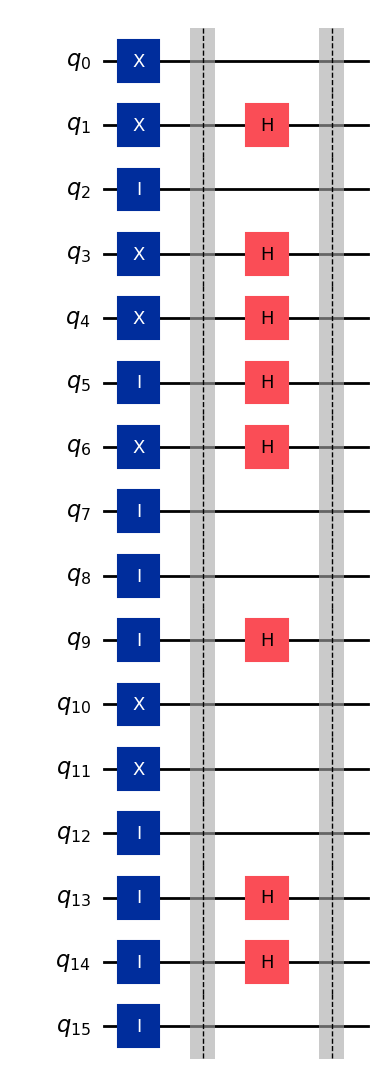

In [6]:
####  TASK 1  ####
# Convert the classical bit to Qubits depending on the above scheme

def prepare_states(bits, basis, key_length):
    qc = QuantumCircuit(key_length)  # Create a quantum circuit with qubits and classical bits
    for i, basis in enumerate(basis):
        bit = bits[i]
        ####  Code goes Here  ####

        # for bit = 1
        if(bit == 1):
            qc.x(i)
        else:
            qc.id(i)
        qc.barrier(i)

        # Only For D basis
        if(basis == POSSIBLE_BASES[1]):
            qc.h(i)
    return qc

# Prepare Agent Alice's quantum states
alice_qc = prepare_states(alice_bits, alice_bases, key_length)
alice_qc.barrier()
alice_qc.draw("mpl") # use keyword output="mpl" for colors

Now that Agent A has already set up her states, Agent B is ready to receive them.\
Agent B has picked random Bases for the measurements.

In [7]:
# Generate Bob's random bases

bob_bases = Generate_random_bases(key_length)
print("Agent Bob's bases: ", bob_bases)

Agent Bob's bases:  ['D', 'H', 'H', 'H', 'D', 'D', 'H', 'H', 'D', 'D', 'D', 'H', 'D', 'H', 'H', 'D']


Qiskit by default does measurements along Z-axis (computational).\
However, we want the measurements along H (Z-axis) and D (X-axis). Prepare the measurement Bases for Agent Bob.\

- *Basis:* H, D (not to confuse with gates !)
- H -> Z-axis (|0>, |1>)
- D -> X-axis (|+>, |->)

*Hint: Use quantum gate transformations. Code only for Diagonal Basis.*

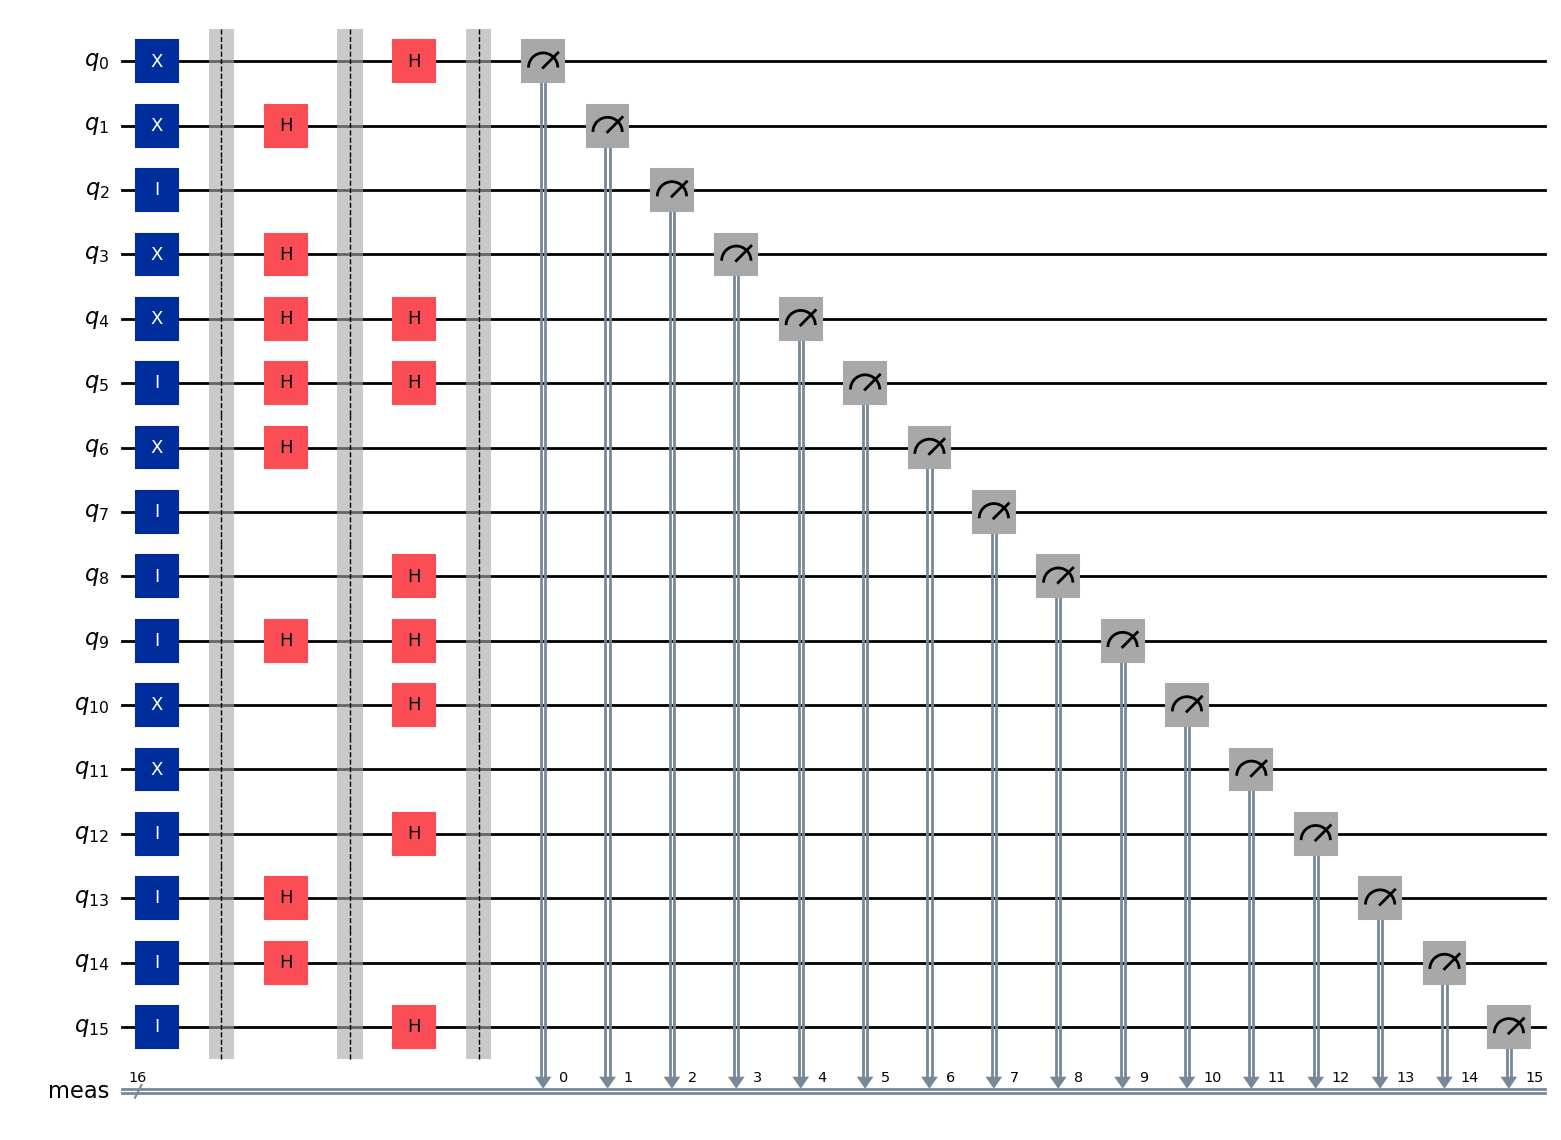

In [8]:
####  TASK 2  ####
# Setup the measurement for D Bases for Agent Bob

def measure_states(qc: QuantumCircuit, bases):
    for i, basis in enumerate(bases):
        ####  Code goes Here  ####
        # D Basis
        if(basis == POSSIBLE_BASES[1]):
            qc.h(i)
        pass
    
    # Measure all qubits (adds a barrier)
    qc = qc.measure_all(inplace= False)
    return qc

# Set up Agent Bob's measurements
bob_qc = measure_states(alice_qc, bob_bases)
bob_qc.draw("mpl")  # use keyword output="mpl" for colors

Good, Message received and Measured. Time to get the actual data, Agent.

Measurement results: {'0100110001011001': 2, '1011110001010011': 1, '1111100000010000': 1, '0101110001011011': 2, '1010100000011010': 1, '1110110001010010': 2, '1110100001010001': 1, '0010100001010000': 1, '1101110001010010': 1, '1001100000011011': 1, '0011100101010001': 2, '1110100100010011': 3, '1001110101010010': 2, '0100100001011001': 2, '0110110000011000': 1, '1000110001011000': 3, '0000100101010000': 3, '0100100101011011': 1, '0001110101011000': 1, '1110100100011010': 1, '0110110101010010': 3, '1110110100010011': 1, '0000110001010001': 1, '0000110100010010': 2, '0011110000010010': 1, '0110100000011011': 2, '0011110101010001': 1, '1011110101010010': 1, '0111110101011001': 2, '0011100100010000': 1, '1101110000010011': 2, '1000110100011000': 6, '1000110101010010': 2, '0001110000011011': 1, '1000100000011011': 1, '0111100100010010': 1, '0111110100010011': 2, '0010100101010010': 2, '0010110000011011': 2, '0111110000010001': 1, '1000110100010011': 2, '0001110100010000': 2, '01011101000

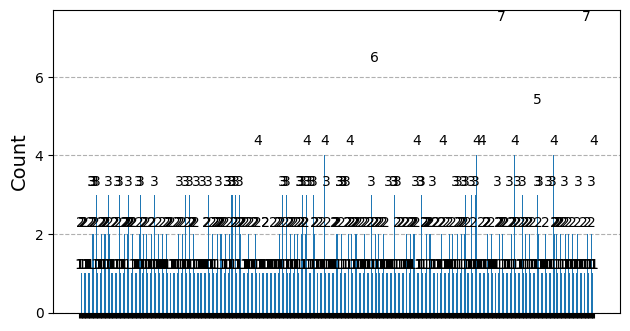

In [ ]:
# Simulate the circuit using AerSimulator
def Qsimulator(qc, msg = False):
   # choose one depending on your system or leave default
   simulator = AerSimulator(method= SIMULATOR_METHOD)

   # For execution (This is version only qiskit v1.4)
   transpiled_qc = transpile(qc, simulator)  # Transpile the circuit for the simulator
   sim_result = simulator.run(transpiled_qc).result()

   # Agent Bob's measurements simulation
   counts = sim_result.get_counts()
   if(msg):
      print("Measurement results:", counts)
   
   return counts

counts = Qsimulator(bob_qc, True)
# To Check how many key strings generated with frequency
# plot_histogram(counts)

####  Special plot  ####
fig = plot_histogram(counts)
if isinstance(fig, tuple): # handles cases where fig is a tuple (fig, ax)
   ax = fig[1]
else:
   ax = fig.gca()
ax.set_xticklabels([]) # Remove x-axis labels
fig

#### TASK 3
With the simulations here, you need to pick which key string are you going to choose Agent.\
We leave the choice upto to you. A good choice of key string can mean more matches.

*Hint: You need to pick only one key string.*

In [10]:
####  TASK 3  ####
# Convert counts to Bob's measurement results

# Get the only 1 bitstring from the count's keys
def pick_string(count_keys):
    ####  Code goes Here  ####
    selected_key = max(count_keys, key=count_keys.get)
    return selected_key

# Convert the key string back to bits
bob_string = pick_string(counts)
bob_bits = [int(bit) for bit in bob_string[::-1]]   # qiskit orders q0q1q2...
print("Bob's measured bits: ", bob_bits)

Bob's measured bits:  [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]


You have picked a bit string Agent.\
Well, go for the next stage, try to use the BB84 protocol and infer from your bases only.\
We are only concerned with places where the basis for measurement of Agent A and Agent B match.\
You can try to use the resources to find a table consisting of all combination of possibilities.

In [ ]:
####  TASK 4  ####
# Record the positions where Agent B can say with confidence which bits Agent A sent depending on basis
bit_positions = [] # put 0 or 1 on the indexes where you can say for guarantee

# Also, store the likely key
unity_index = []

def infer_bits(bits, prep_bases, measure_bases, key_length):
    u_index, bit_pos = [], list([EMPTY] * key_length)

    for i, bit in enumerate(bits):
        ####  Code goes Here  ####
        if(prep_bases[i] == measure_bases[i]):
            u_index.append(bit)
            bit_pos[i] = bit
        pass
    return u_index, bit_pos

# Infered key bits from measurements
unity_index, bit_positions = infer_bits(bob_bits, alice_bases, bob_bases, key_length)
print("Likely key from matched Bases:", unity_index)

Likey key from matched Bases: [0, 1, 0, 0, 0, 1]


In case, *the likely key, comes out to be EMPTY*. Thats because of random choice and quantum noise in simulations.\
Just re-run the file till you get a non-EMPTY key.\
\
Alright Agent, Now comes the crucial part.\
Agent A had talked with Agent B over the public channel, so anyone could have intercepted.\
We need to check the Quantum Bit Error Rate (QBER) for the key.\
If the Error exceeds a certain threshold then the states might have been intercepted.

In [12]:
####  TASK 5  ####
# Make the function which will compare the similarity between two key slices based on how many bits match

# If error exceeds tolerance, then return false, else true
# Also make sure if both lengths are equal, else its obvious fail
def low_key_error(sifted_key_part_1, sifted_key_part_2, tolerance = 0.1):
    err = 0
    if(len(sifted_key_part_1) != len(sifted_key_part_2)):
        return False

    ####  Code goes Here  ####
    for i in range(len(sifted_key_part_1)):
        if(sifted_key_part_1[i] != sifted_key_part_2[i]):
            err += 1

    # If tolerance exceeded
    if(tolerance < err / len(sifted_key_part_1)):
        return False
    return True


# The part of the key bob and Alice will make it public for checking errors
# You can change public_key_part to 1/2 if you feel your sifted keys are always less than 4 bits. default 1/4
public_key_part = 1 / 4
err_check_num = int(len(unity_index) * public_key_part)

# Get the keys for both Alice and Bob so we can do a QBER check
alice_sifted_key, _ = infer_bits(alice_bits, alice_bases, bob_bases, key_length)
bob_sifted_key, _ = infer_bits(bob_bits, alice_bases, bob_bases, key_length)

# print(alice_sifted_key)
# print(bob_sifted_key)

# Part of the key has been made public and now discarded, so check for Errors
if(err_check_num > 0):
    print("Low Error in sifted keys:", low_key_error(alice_sifted_key[:err_check_num], bob_sifted_key[:err_check_num]))
else:
    print("Key too small to compare.")

Low Error in sifted keys: True


In [13]:
# Final keys
# There may be very slight mismatch as the chance of both the random basis matching is 50%
# along with the accepted tolerance is at 10%
alice_sifted_key = alice_sifted_key[err_check_num:]
bob_sifted_key = bob_sifted_key[err_check_num:]

print("Alice's key:", alice_sifted_key)
print("bob's key:", bob_sifted_key)

Alice's key: [1, 0, 0, 0, 1]
bob's key: [1, 0, 0, 0, 1]


### Mission complete
Well done, Agent. Time for field testing.

### New Mission Objective:
- Help Agent A and Agent B communicate the below message
- Encrypt and Decrypt using the key
- Abort the protocol if Fault tolerance is exceeded

In [14]:
# This Agent Alice's message
important_message = "QuantumKey"

In [15]:
# A message to bits encryption and decryption protocol
# This return None on invalid values and on valid values returns a list of encrypted bits or string after decryption
sample_key = [1,0,1]

# Change the sample key to see the effect on sample bits
sample_bits = encryption_decryption("I am Quantum", sample_key)

print(sample_bits)
print("Decrypted message:", encryption_decryption(sample_bits, sample_key, "decryption"))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Decrypted message: I am Quantum


Complete the full implementation for the QKD BB84.

In [16]:
####  TASK 6  ####
# Use the below functions and make a complete encryption, decryption procedure
key_length = MAX_KEY_LENGTH

# The key loop
def generate_key_pair(trials):
    global alice_sifted_key, bob_sifted_key, t
    alice_sifted_key, bob_sifted_key, t = [0], [1], 0

    while(alice_sifted_key != bob_sifted_key and t < trials):
        # Generate the random bits for the key.

        ####  Code goes Here  ####
        alice_bits = generate_random_bits(key_length)
        alice_bases = Generate_random_bases(key_length)

        # print(alice_bits)
        # print(alice_bases)

        alice_qc = prepare_states(alice_bits, alice_bases, key_length)
        bob_bases = Generate_random_bases(key_length)

        # Hand over the states from Agent Alice to Agent Bob for measurement
        bob_qc = measure_states(alice_qc, bob_bases)
        counts = Qsimulator(bob_qc)

        ####  Code goes Here  ####
        bob_string = pick_string(counts)
        bob_bits = [int(bit) for bit in bob_string[::-1]]

        # print(bob_bases, len(bob_bases))
        # print(bob_bits, len(bob_bits))

        ####  Code goes Here  ####
        unity_index, bit_positions = infer_bits(alice_bits, alice_bases, bob_bases, key_length)

        alice_sifted_key, _ = infer_bits(alice_bits, alice_bases, bob_bases, key_length)
        bob_sifted_key, _ = infer_bits(bob_bits, alice_bases, bob_bases, key_length)

        err_check_num = int(len(unity_index) * public_key_part)

        # Part of the key has been made public and now discarded, so check for Errors
        if(err_check_num > 0 and 2 * err_check_num < len(unity_index)):
            err_val = low_key_error(alice_sifted_key[:err_check_num], bob_sifted_key[:err_check_num])
            print("Low Error in sifted keys:", err_val)
        else:
            print("Key too small to compare.")
            t += 1
            continue

        ####  Code goes Here  ####
        alice_sifted_key = alice_sifted_key[err_check_num:]
        bob_sifted_key = bob_sifted_key[err_check_num:]
        t += 1

# Number of trials to make for making key pair
trials = 10
generate_key_pair(trials= trials)
print(f"Trials taken to generate key: {t} / {trials}")
print("Alice key", alice_sifted_key)
print("Bob key", bob_sifted_key)

Low Error in sifted keys: True
Trials taken to generate key: 1 / 10
Alice key [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]
Bob key [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]


In [17]:
# For message transmission
print("Alice sent:", important_message)

# Alice encrypts using her key
encrypted_message = encryption_decryption(important_message, alice_sifted_key)

print("Encrypted binary message:", encrypted_message)

# Hand over the message over public communication
# Bob decrypts using his key
decrypted_message = encryption_decryption(encrypted_message, bob_sifted_key, "decryption")
print("Bob reads:", decrypted_message)

Alice sent: QuantumKey
Encrypted binary message: [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1]
Bob reads: QuantumKey


#### *For any doubts feel free to contact me.*
- Notebook by Anshurup gupta\
[email: anshurup.gupta@gmail.com](mailto:anshurup.gupta@gmail.com)